# Matplotlib.pyplot  
# Author : Michelle O'Connor  

***
<br> 

### Overview of matplotlib.plot

Matplotlib is a low level graph plotting library in python that serves as a visualization utility, created by John D. Hunter.

Matplotlib is open source is mostly written in python, a few segments are written in C, Objective-C and Javascript for Platform compatibility.  

https://www.w3schools.com/python/matplotlib_intro.asp

Most of the Matplotlib utilities lies under the pyplot submodule, and are usually imported under the plt alias:    

    import matplotlib.pyplot as plt

matplotlib.pyplot provides a procedueral interface to the matplotlib object oriented lottng library.    
https://scipy-lectures.org/intro/matplotlib/index.html  

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.     

Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.   
In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes (please note that “axes” here and in most places in the documentation refers to the axes part of a figure and not the strict mathematical term for more than one axis).   

I will explain some of the important commands with interactive examples

### Import required modules

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

###  pyplot commands

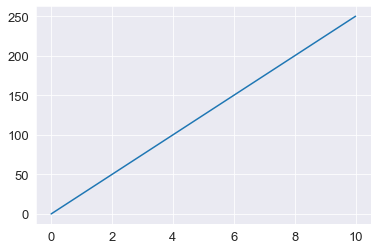

In [37]:
# Let's start by drawing a simple line plot
x = np.array([0, 10])
y = np.array([0, 250])
plt.plot(x, y)
plt.show()

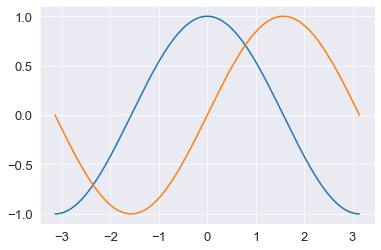

In [38]:
# Draw a cosine and sine functions on the same plot
# X is now a numpy array with 256 values ranging from -π to +π (included). 
X = np.linspace(-np.pi, np.pi, 256)
# C is the cosine (256 values) and S is the sine (256 values).
C, S = np.cos(X), np.sin(X)
plt.plot(X, C)
plt.plot(X, S)
plt.show()

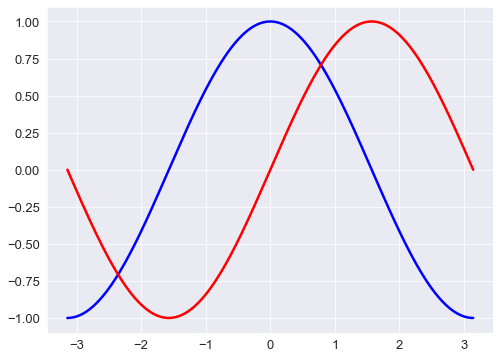

In [44]:
# Increase the figure size to 8,6
plt.figure(figsize=(8, 6))
# Change the cosine line to blue and the sine line to red
# Increase the line width to 2.5 
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")
plt.show()

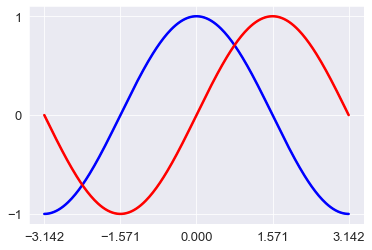

In [47]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)
plt.plot(X, C)
plt.plot(X, S)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])
plt.show()

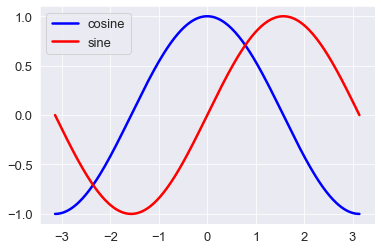

In [50]:
# Adding a label to each line and showing the legen on the upper left of the plot
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")
plt.legend(loc='upper left')

Matplotlib comes with a set of default settings that allow customizing all kinds of properties. You can control the defaults of almost every property in matplotlib: figure size and dpi, line width, color and style, axes, axis and grid properties, text and font properties and so on.  
https://scipy-lectures.org/intro/matplotlib/index.html

In [4]:
# https://towardsdatascience.com/a-simple-guide-to-beautiful-visualizations-in-python-f564e6b9d392
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [5]:
# Adjust figure size and clean up padding in plot/subplots
plt.figure(figsize=(8,4), tight_layout=True)

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

In [6]:
# Figure appearance
# plt.hist(..., color=sns.color_palette('Set2')[2], linewidth=2)

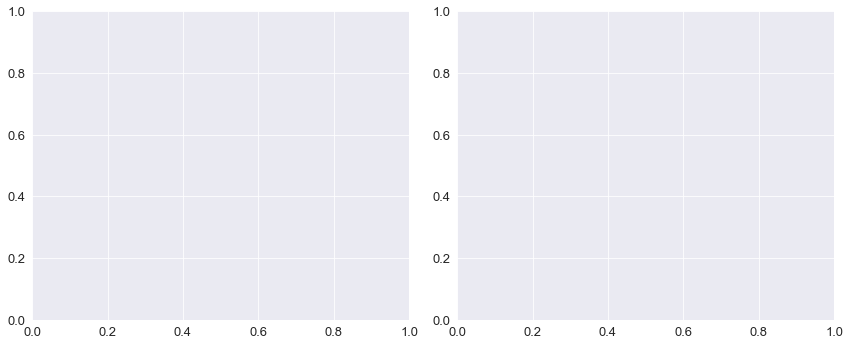

In [7]:
#subplots
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12, 5), tight_layout=True)

In [8]:
df_fifa21 = pd.read_csv('fifa-data/fifa2021players.csv')
country = ['United States', 'Canada', 'England', 'Brazil', 'Argentina']
df_country = df_fifa21[df_fifa21['nationality'].isin(country)]

In [9]:
# Preprocessing
barplot = df_country.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]

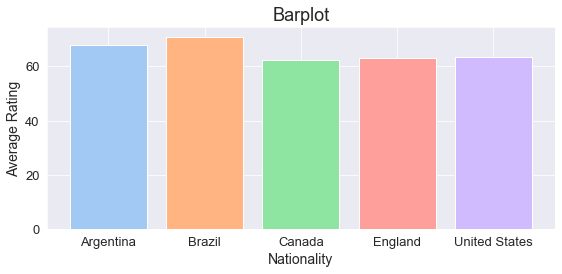

In [10]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('pastel')
plt.bar(barplot['nationality'], barplot['overall'], color=colors[:5])
# plt.bar(barplot['nationality'], barplot['overall'])
plt.xlabel('Nationality')
plt.ylabel('Average Rating')
plt.title('Barplot')
plt.show()

In [11]:
# Preprocessing
barplot = df_country[df_country['league_name'].isin(['Spain Primera Division', 'Italian Serie A', 'German 1. Bundesliga'])]
barplot = barplot.groupby(['nationality', 'league_name'], as_index=False).count()

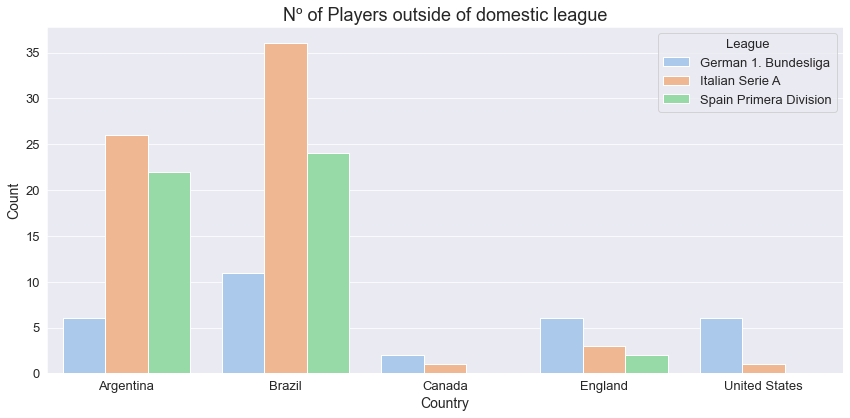

In [12]:
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=barplot['nationality'], y=barplot['sofifa_id'], hue=barplot['league_name'], palette='pastel')
ax.set(title='Nº of Players outside of domestic league' ,xlabel='Country', ylabel='Count')
ax.legend(title='League', title_fontsize='13', loc='upper right')
plt.show()

Text(0, 0.5, 'Count')

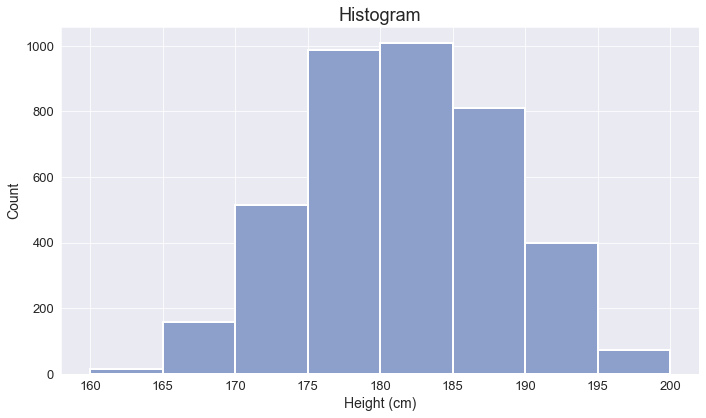

In [13]:
plt.figure(figsize=(10,6), tight_layout=True)
bins = [160, 165, 170, 175, 180, 185, 190, 195, 200]
# matplotlib
plt.hist(df_country['height_cm'], bins=bins, color=sns.color_palette('Set2')[2], linewidth=2)
plt.title('Histogram')
plt.xlabel('Height (cm)')
plt.ylabel('Count')

In [14]:
# Preprocessing
piechart = df_fifa21[df_fifa21['club_name']=='Chelsea']
piechart = piechart.sort_values('value_eur', ascending=False)[['short_name', 'value_eur']]
piechart = piechart[:11]

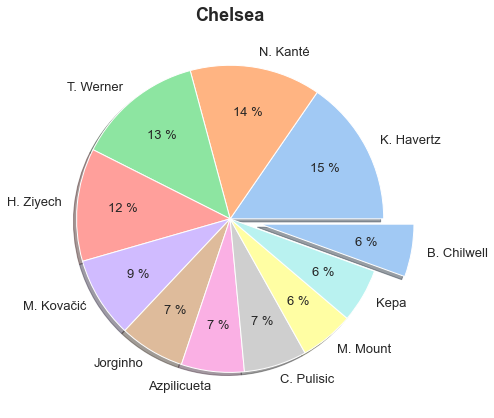

In [15]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(7, 6), tight_layout=True)
explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
plt.pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
plt.title('Chelsea', weight='bold')
plt.show()

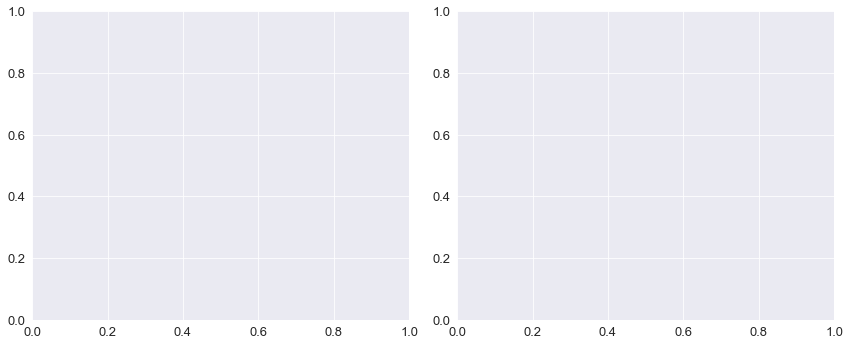

In [16]:
#subplots
fig, ax = plt.subplots(1,2, figsize=(12, 5), tight_layout=True)
# Preprocessing
piechart2 = df_fifa21[df_fifa21['nationality']=='United States']
piechart2 = piechart2[:10].sort_values('value_eur')[['short_name', 'value_eur']]

In [21]:
colors = sns.color_palette('pastel')

explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
ax[0].pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[0].set_title('Chelsea', weight='bold')

explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ax[1].pie(piechart2['value_eur'], labels=piechart2['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[1].set_title('USA', weight='bold')
plt.show()

In [18]:
# preprocessing
df_fifa21 = pd.read_csv('fifa-data/fifa2021players.csv')
df_fifa20 = pd.read_csv('fifa-data/fifa2020players.csv')
df_fifa19 = pd.read_csv('fifa-data/fifa2019players.csv')
df_fifa18 = pd.read_csv('fifa-data/fifa2018players.csv')
df_fifa17 = pd.read_csv('fifa-data/fifa2017players.csv')
frames = [df_fifa17, df_fifa18, df_fifa19, df_fifa20, df_fifa21]
for i, frame in enumerate(frames):
    frame['year'] = 2017 + i
    
lineplot = pd.concat(frames)[['short_name', 'overall', 'year']]
list_players = ['L. Messi', 'Cristiano Ronaldo', 'K. De Bruyne', 'K. Mbappé', 'V. van Dijk']
lineplot = lineplot[lineplot['short_name'].isin(list_players)]
lineplot = lineplot.pivot(index='short_name', columns='year' ,values='overall').T
lineplot.reset_index(inplace=True)
lineplot = lineplot.set_index('year')

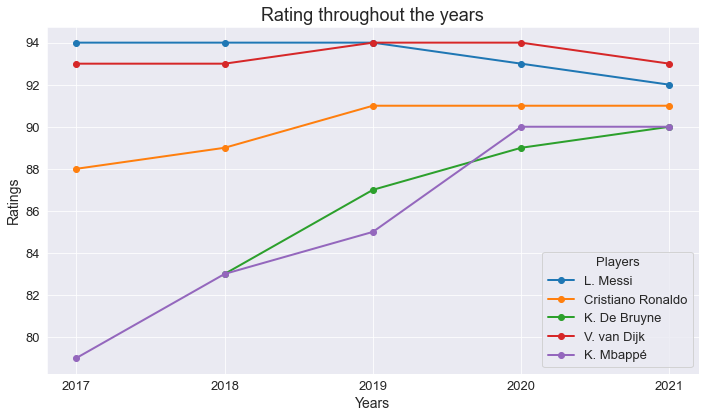

In [19]:
plt.figure(figsize=(10,6), tight_layout=True)
#plotting
plt.plot(lineplot, 'o-', linewidth=2)
#customization
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xlabel('Years')
plt.ylabel('Ratings')
plt.title('Rating throughout the years')
plt.legend(title='Players', title_fontsize = 13, labels=['L. Messi', 'Cristiano Ronaldo', 'K. De Bruyne', 'V. van Dijk', 'K. Mbappé'])
plt.show()

In [20]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html